In [13]:
from transformers import BertForSequenceClassification, BertTokenizer

import torch
import pandas as pd
from pipeline import create_dataloaders, train_bert, evaluate_bert
from torch.optim import Adam

import torch.nn as nn
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
import matplotlib.pyplot as plt

In [14]:
file_path = 'sampled_preprocessed.json'
df = pd.read_json(file_path)

In [15]:
bert_model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)
bert_model = bert_model.to(device)
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [16]:
batch_size = 32
max_len = 128
train_loader, val_loader, test_loader = create_dataloaders(df, tokenizer, batch_size=batch_size, max_len=max_len)
                                                           
optimizer = Adam(bert_model.parameters(), lr=1e-3)


In [17]:
train_losses = []
train_accuracies = []
val_accuracies = []

n_epochs = 8  # Set the number of epochs
for epoch in range(n_epochs):
    print(f"Epoch {epoch+1}/{n_epochs}")
    
    train_loss, train_acc = train_bert(bert_model, train_loader, optimizer, device)
    val_acc = evaluate_bert(bert_model, val_loader, device)
    
    # Append metrics
    train_losses.append(train_loss)
    train_accuracies.append(train_acc)
    val_accuracies.append(val_acc)
    
    print(f'Epoch {epoch+1}: Train Loss {train_loss:.4f}, Train Acc {train_acc:.4f}, Val Acc {val_acc:.4f}')

Epoch 1/8


Evaluating: 100%|██████████| 9/9 [00:16<00:00,  1.81s/it, acc=0.737] 


Epoch 1: Train Loss 0.6047, Train Acc 0.7260, Val Acc 0.7374
Epoch 2/8


Evaluating: 100%|██████████| 9/9 [00:14<00:00,  1.59s/it, acc=0.737] 


Epoch 2: Train Loss 0.6073, Train Acc 0.7285, Val Acc 0.7374
Epoch 3/8


Evaluating: 100%|██████████| 9/9 [00:14<00:00,  1.56s/it, acc=0.737] 


Epoch 3: Train Loss 0.5897, Train Acc 0.7365, Val Acc 0.7374
Epoch 4/8


Evaluating: 100%|██████████| 9/9 [00:14<00:00,  1.65s/it, acc=0.737] 


Epoch 4: Train Loss 0.5856, Train Acc 0.7359, Val Acc 0.7374
Epoch 5/8


Evaluating: 100%|██████████| 9/9 [00:15<00:00,  1.68s/it, acc=0.737] 


Epoch 5: Train Loss 0.5810, Train Acc 0.7362, Val Acc 0.7374
Epoch 6/8


Evaluating: 100%|██████████| 9/9 [00:14<00:00,  1.64s/it, acc=0.737] 


Epoch 6: Train Loss 0.5852, Train Acc 0.7362, Val Acc 0.7374
Epoch 7/8


Evaluating: 100%|██████████| 9/9 [00:13<00:00,  1.52s/it, acc=0.737] 


Epoch 7: Train Loss 0.5783, Train Acc 0.7371, Val Acc 0.7374
Epoch 8/8


Evaluating: 100%|██████████| 9/9 [00:14<00:00,  1.63s/it, acc=0.737] 

Epoch 8: Train Loss 0.5810, Train Acc 0.7359, Val Acc 0.7374


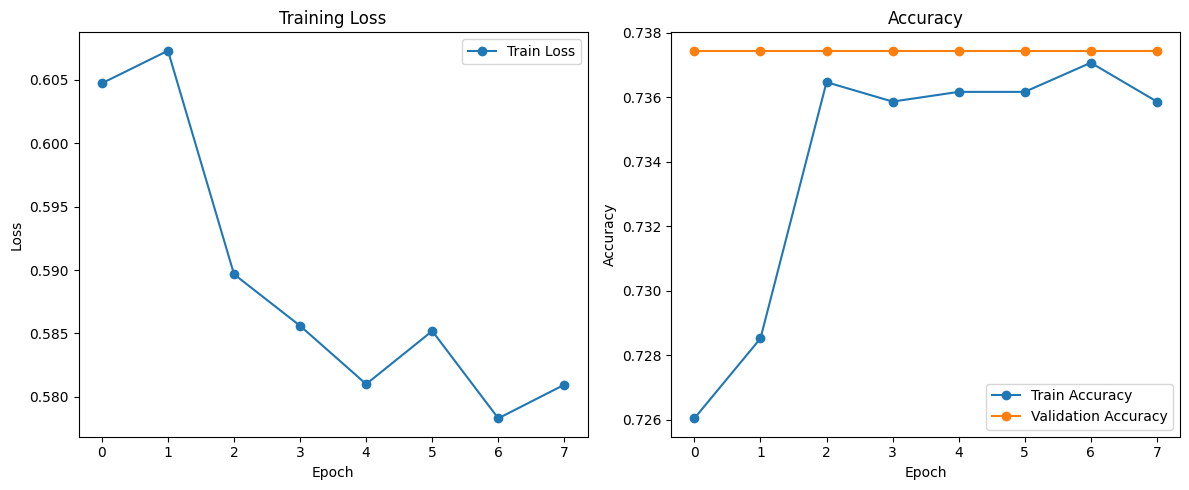

In [18]:
plt.figure(figsize=(12, 5))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(range(n_epochs), train_losses, label='Train Loss', marker='o')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(range(n_epochs), train_accuracies, label='Train Accuracy', marker='o')
plt.plot(range(n_epochs), val_accuracies, label='Validation Accuracy', marker='o')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()